In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"data\site_1_train_data.csv")

In [3]:
df.head()

,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,NO2_satellite,HCHO_satellite,ratio_satellite,O3_target,NO2_target
0,2022.0,7.0,28.0,0.0,73.35,57.54,22.99,7.68,-3.46,1.28,1.02,NaN,NaN,NaN,5.03,6.75
1,2022.0,7.0,28.0,1.0,82.77,57.25,23.90,7.70,-1.35,0.29,0.99,NaN,NaN,NaN,5.08,6.07
2,2022.0,7.0,28.0,2.0,92.19,56.97,23.89,7.72,0.76,-0.70,0.96,NaN,NaN,NaN,6.95,3.38
3,2022.0,7.0,28.0,3.0,101.62,56.68,23.92,7.74,2.87,-1.69,0.93,NaN,NaN,NaN,5.80,4.85
4,2022.0,7.0,28.0,4.0,113.51,64.06,25.55,7.81,2.45,-1.15,0.66,NaN,NaN,NaN,7.22,7.72


In [4]:
df.shape

(25081, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25081 entries, 0 to 25080
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             25081 non-null  float64
 1   month            25081 non-null  float64
 2   day              25081 non-null  float64
 3   hour             25081 non-null  float64
 4   O3_forecast      25081 non-null  float64
 5   NO2_forecast     25081 non-null  float64
 6   T_forecast       25081 non-null  float64
 7   q_forecast       25081 non-null  float64
 8   u_forecast       25081 non-null  float64
 9   v_forecast       25081 non-null  float64
 10  w_forecast       25081 non-null  float64
 11  NO2_satellite    827 non-null    float64
 12  HCHO_satellite   901 non-null    float64
 13  ratio_satellite  794 non-null    float64
 14  O3_target        25081 non-null  float64
 15  NO2_target       25081 non-null  float64
dtypes: float64(16)
memory usage: 3.1 MB


In [6]:
df.describe()

,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,NO2_satellite,HCHO_satellite,ratio_satellite,O3_target,NO2_target
count,25081.000000,25081.000000,25081.000000,25081.000000,25081.000000,25081.000000,25081.00000,25081.000000,25081.000000,25081.000000,25081.000000,827.000000,901.000000,794.000000,25081.000000,25081.000000
mean,2021.591484,6.336829,15.708704,11.499541,69.472983,61.465255,23.90396,12.175782,0.377179,-0.484007,-0.054889,0.828912,1.604817,0.821662,26.685846,35.846456
std,1.451864,3.442965,8.826802,6.922567,61.373626,41.902674,8.21207,5.455621,2.118990,1.307774,1.464262,0.565964,0.853743,1.654282,31.532385,28.289381
min,2019.000000,1.000000,1.000000,0.000000,0.000000,3.320000,2.85000,2.710000,-8.520000,-6.690000,-9.160000,0.140000,0.000000,0.060000,0.200000,0.380000
25%,2020.000000,3.000000,8.000000,5.000000,23.020000,27.340000,17.61000,7.600000,-1.170000,-1.460000,-1.090000,0.500000,0.960000,0.320000,5.330000,16.470000
50%,2022.000000,6.000000,16.000000,11.000000,46.700000,54.430000,25.60000,10.150000,0.670000,-0.610000,-0.080000,0.670000,1.540000,0.460000,14.180000,27.730000
75%,2023.000000,9.000000,23.000000,17.000000,111.760000,85.560000,29.88000,17.510000,1.890000,0.480000,1.060000,0.940000,2.110000,0.780000,34.950000,47.250000
max,2024.000000,12.000000,31.000000,23.000000,524.310000,424.830000,44.85000,24.090000,8.170000,5.260000,5.650000,4.340000,5.160000,28.110000,199.350000,288.570000


In [7]:
df = df.drop(columns=["NO2_satellite","HCHO_satellite","ratio_satellite"])
df.head()

,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,O3_target,NO2_target
0,2022.0,7.0,28.0,0.0,73.35,57.54,22.99,7.68,-3.46,1.28,1.02,5.03,6.75
1,2022.0,7.0,28.0,1.0,82.77,57.25,23.90,7.70,-1.35,0.29,0.99,5.08,6.07
2,2022.0,7.0,28.0,2.0,92.19,56.97,23.89,7.72,0.76,-0.70,0.96,6.95,3.38
3,2022.0,7.0,28.0,3.0,101.62,56.68,23.92,7.74,2.87,-1.69,0.93,5.80,4.85
4,2022.0,7.0,28.0,4.0,113.51,64.06,25.55,7.81,2.45,-1.15,0.66,7.22,7.72


In [8]:
for col in df.columns:
    print(col, "Min:", df[col].min(), "Max:", df[col].max())

year Min: 2019.0 Max: 2024.0
month Min: 1.0 Max: 12.0
day Min: 1.0 Max: 31.0
hour Min: 0.0 Max: 23.0
O3_forecast Min: 0.0 Max: 524.31
NO2_forecast Min: 3.32 Max: 424.83
T_forecast Min: 2.85 Max: 44.85
q_forecast Min: 2.71 Max: 24.09
u_forecast Min: -8.52 Max: 8.17
v_forecast Min: -6.69 Max: 5.26
w_forecast Min: -9.16 Max: 5.65
O3_target Min: 0.2 Max: 199.35
NO2_target Min: 0.38 Max: 288.57


In [9]:
df.rename(columns={
    "T_forecast": "Temperature_forecast",
    "q_forecast": "Specific_humidity_forecast",
    "u_forecast": "U_wind_forecast",
    "v_forecast": "V_wind_forecast",
    "w_forecast": "Vertical_wind_forecast"
},inplace=True)

print(df.columns)

Index(['year', 'month', 'day', 'hour', 'O3_forecast', 'NO2_forecast',
       'Temperature_forecast', 'Specific_humidity_forecast', 'U_wind_forecast',
       'V_wind_forecast', 'Vertical_wind_forecast', 'O3_target', 'NO2_target'],
      dtype='object')


In [10]:
df["date"] = pd.to_datetime(df[["year","month","day"]])
df["datetime"] = pd.to_datetime(df[["year","month","day","hour"]])
df.set_index("datetime", inplace=True)
df.sort_index(inplace=True)
df.head()

,year,month,day,hour,O3_forecast,NO2_forecast,Temperature_forecast,Specific_humidity_forecast,U_wind_forecast,V_wind_forecast,Vertical_wind_forecast,O3_target,NO2_target,date
datetime,,,,,,,,,,,,,,
2019-07-14 00:00:00,2019.0,7.0,14.0,0.0,0.12,59.19,21.78,20.14,1.56,-0.07,0.80,5.23,19.40,2019-07-14
2019-07-14 01:00:00,2019.0,7.0,14.0,1.0,0.41,62.09,23.02,20.23,1.39,-0.09,0.79,7.50,17.10,2019-07-14
2019-07-14 02:00:00,2019.0,7.0,14.0,2.0,0.69,64.99,24.61,20.32,1.23,-0.12,0.77,8.93,15.43,2019-07-14
2019-07-14 03:00:00,2019.0,7.0,14.0,3.0,0.98,67.89,24.00,20.40,1.06,-0.15,0.75,11.03,12.62,2019-07-14
2019-07-14 04:00:00,2019.0,7.0,14.0,4.0,1.88,71.59,23.56,21.00,0.94,0.42,0.86,15.57,14.95,2019-07-14


In [11]:
df.isna().sum()

year                          0
month                         0
day                           0
hour                          0
O3_forecast                   0
NO2_forecast                  0
Temperature_forecast          0
Specific_humidity_forecast    0
U_wind_forecast               0
V_wind_forecast               0
Vertical_wind_forecast        0
O3_target                     0
NO2_target                    0
date                          0
dtype: int64

### Year-wise Analysis

In [12]:
yearly_data = df.groupby("year").agg({
    "O3_forecast" : "mean",
    "NO2_forecast" : "mean",
    "Temperature_forecast" : "mean",
    "Specific_humidity_forecast" : "mean",
    "U_wind_forecast" : "mean",
    "V_wind_forecast" : "mean",
    "Vertical_wind_forecast" : "mean"
}).reset_index()

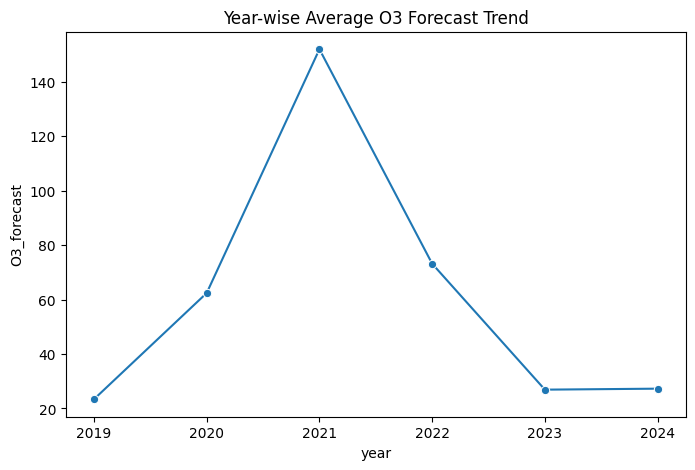

In [13]:
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_data,x="year",y="O3_forecast",marker="o")
plt.title("Year-wise Average O3 Forecast Trend")
plt.show()

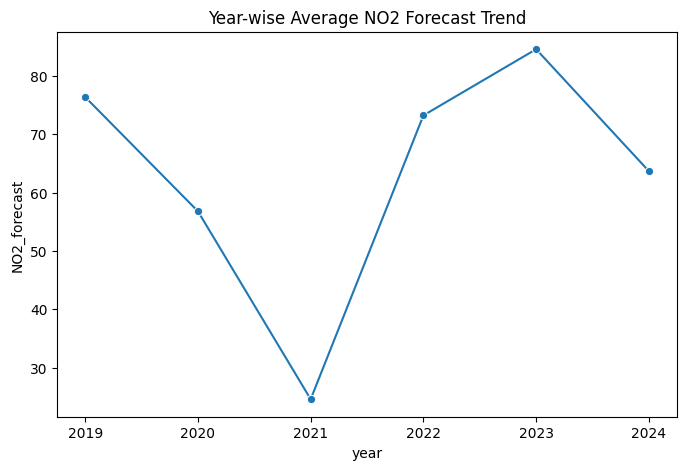

In [14]:
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_data,x="year",y="NO2_forecast",marker="o")
plt.title("Year-wise Average NO2 Forecast Trend")
plt.show()

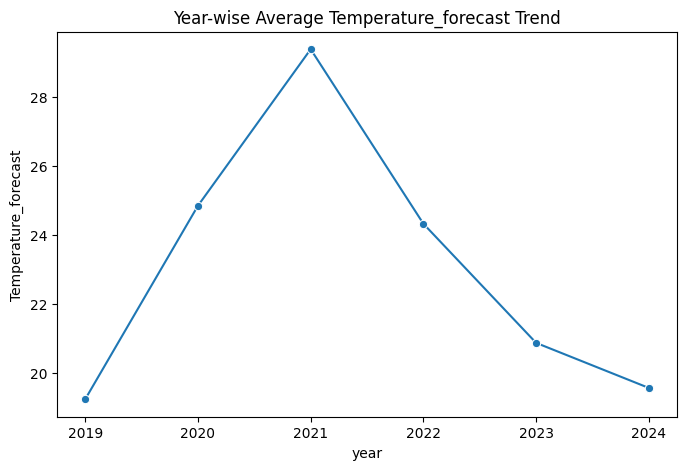

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_data,x="year",y="Temperature_forecast",marker="o")
plt.title("Year-wise Average Temperature_forecast Trend")
plt.show()

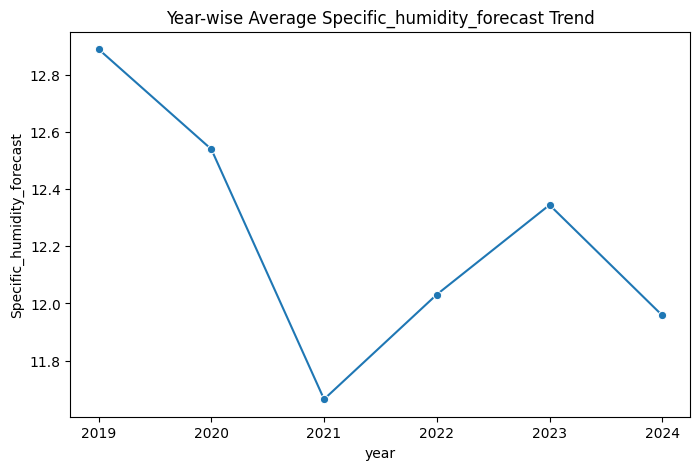

In [16]:
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_data,x="year",y="Specific_humidity_forecast",marker="o")
plt.title("Year-wise Average Specific_humidity_forecast Trend")
plt.show()

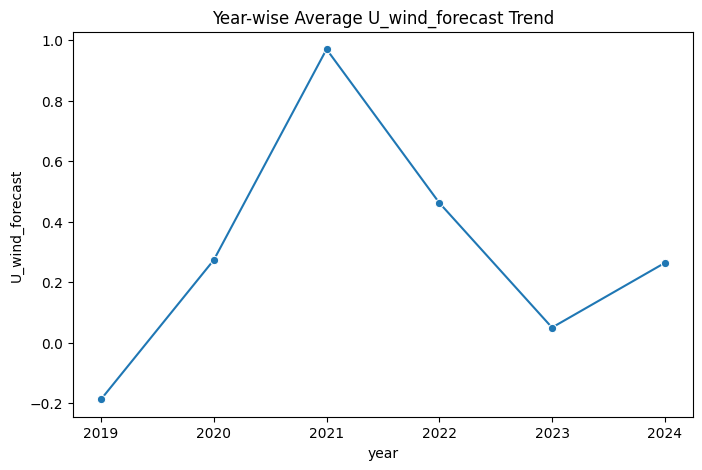

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_data,x="year",y="U_wind_forecast",marker="o")
plt.title("Year-wise Average U_wind_forecast Trend")
plt.show()

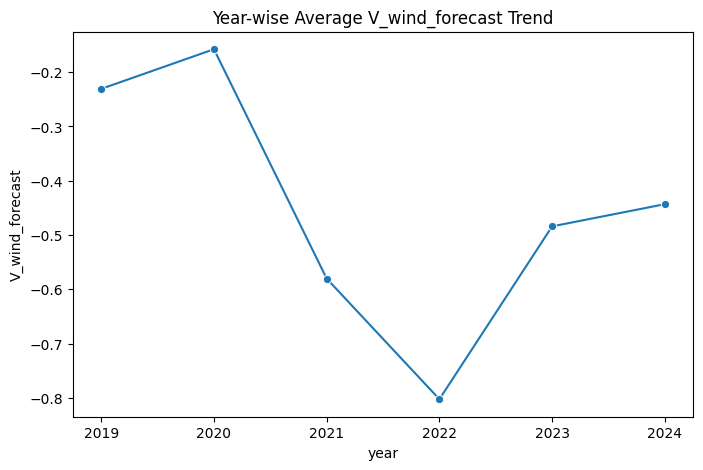

In [18]:
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_data,x="year",y="V_wind_forecast",marker="o")
plt.title("Year-wise Average V_wind_forecast Trend")
plt.show()

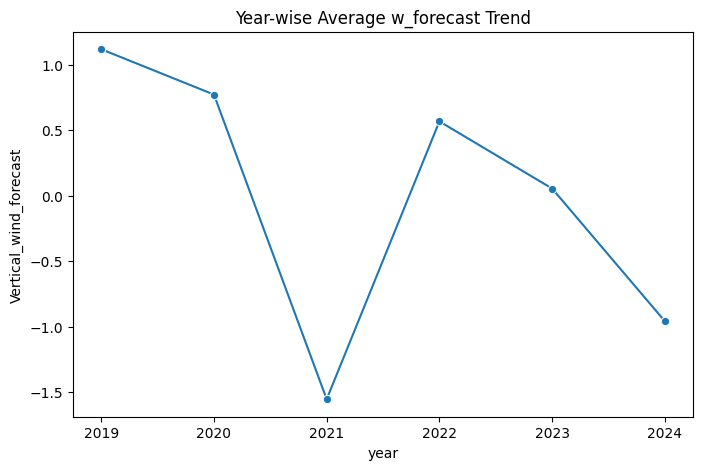

In [19]:
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_data,x="year",y="Vertical_wind_forecast",marker="o")
plt.title("Year-wise Average w_forecast Trend")
plt.show()

### Month-wise Analysis

In [20]:
monthly_data = df.groupby(["year","month"]).agg({
    "O3_forecast" : "mean",
    "NO2_forecast" : "mean",
    "Temperature_forecast" : "mean",
    "Specific_humidity_forecast" : "mean",
    "U_wind_forecast" : "mean",
    "V_wind_forecast" : "mean",
    "Vertical_wind_forecast" : "mean"
}).reset_index()

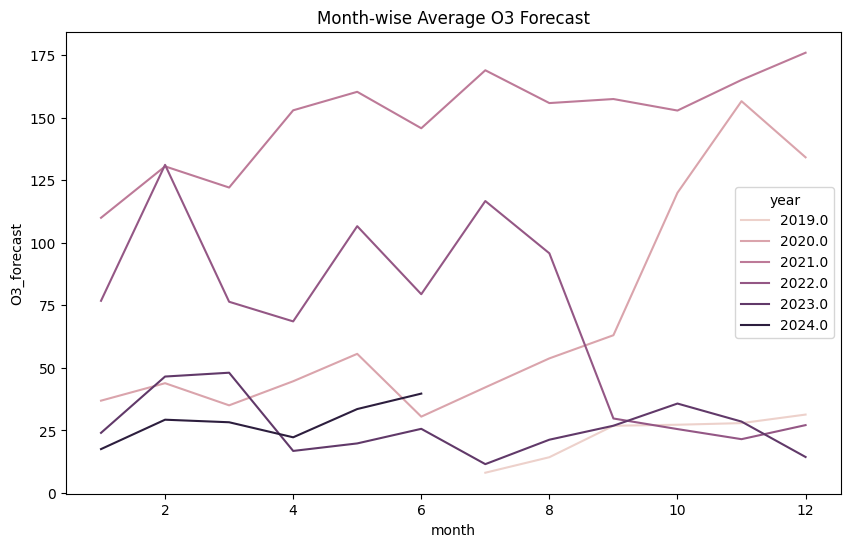

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_data,x="month",y="O3_forecast",hue="year")
plt.title("Month-wise Average O3 Forecast")
plt.show()

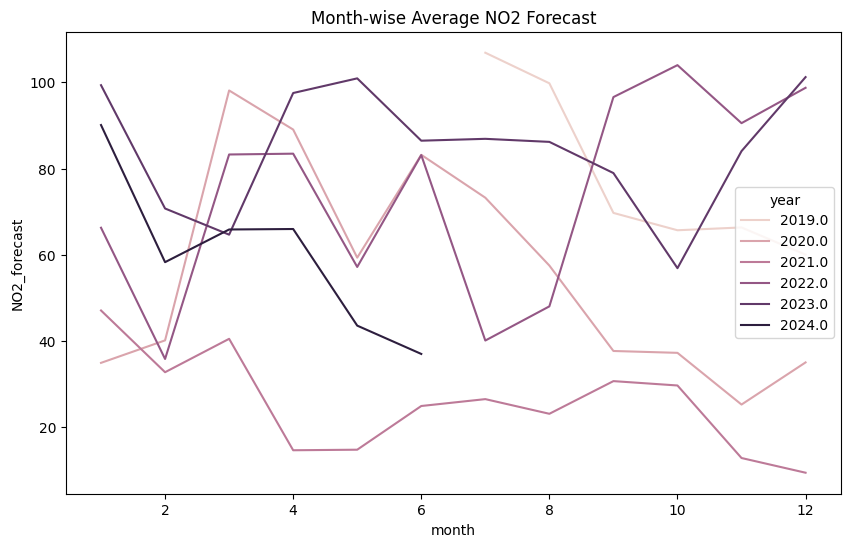

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_data,x="month",y="NO2_forecast",hue="year")
plt.title("Month-wise Average NO2 Forecast")
plt.show()

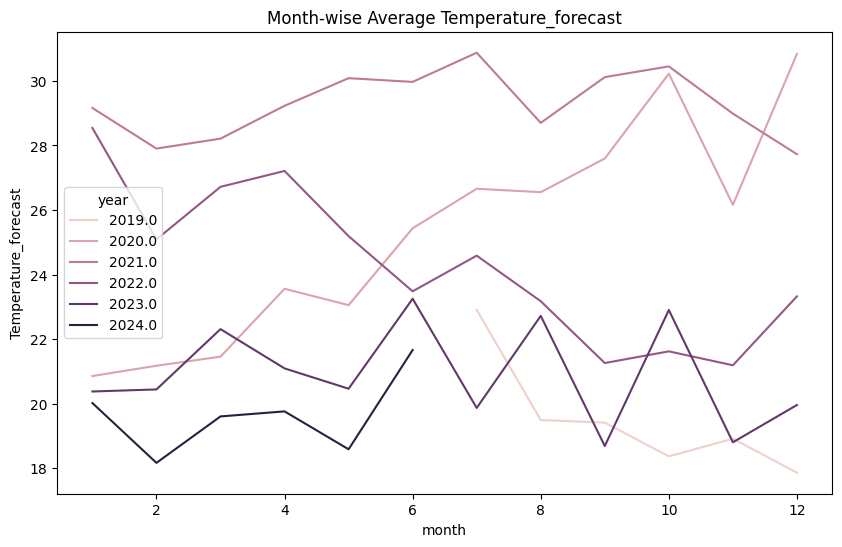

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_data,x="month",y="Temperature_forecast",hue="year")
plt.title("Month-wise Average Temperature_forecast")
plt.show()

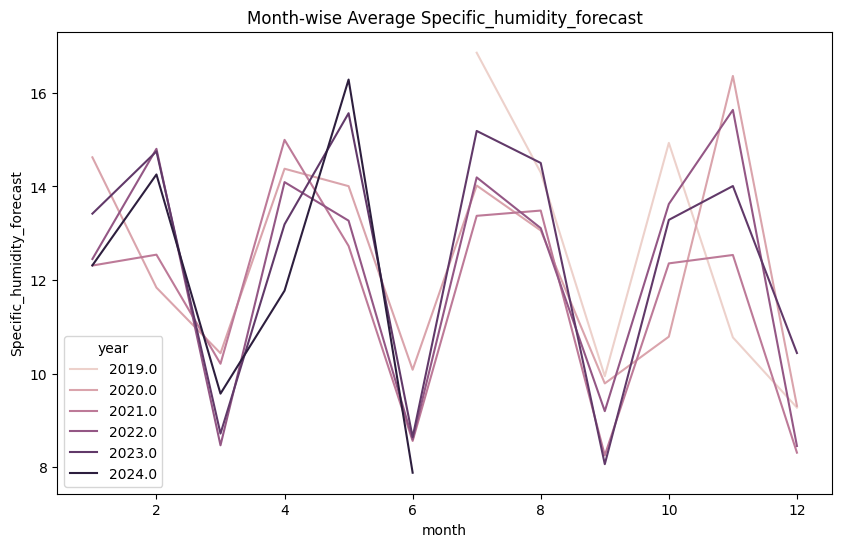

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_data,x="month",y="Specific_humidity_forecast",hue="year")
plt.title("Month-wise Average Specific_humidity_forecast")
plt.show()

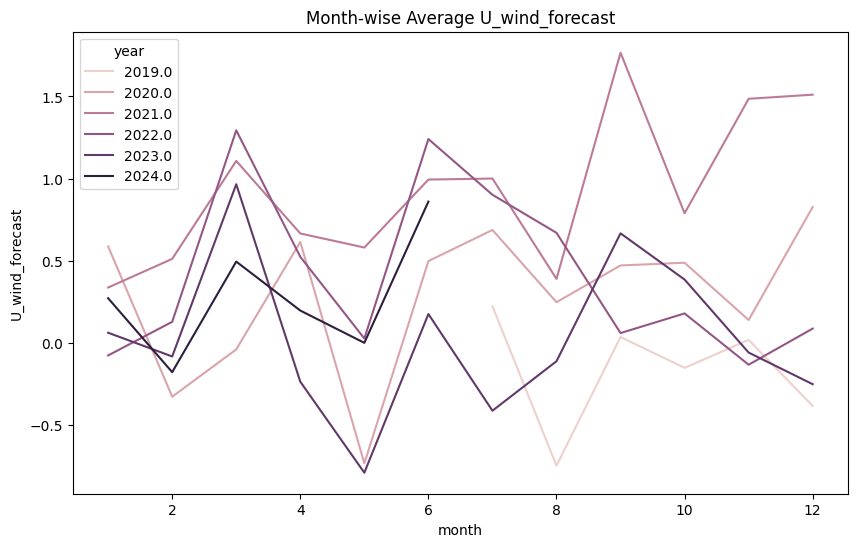

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_data,x="month",y="U_wind_forecast",hue="year")
plt.title("Month-wise Average U_wind_forecast")
plt.show()

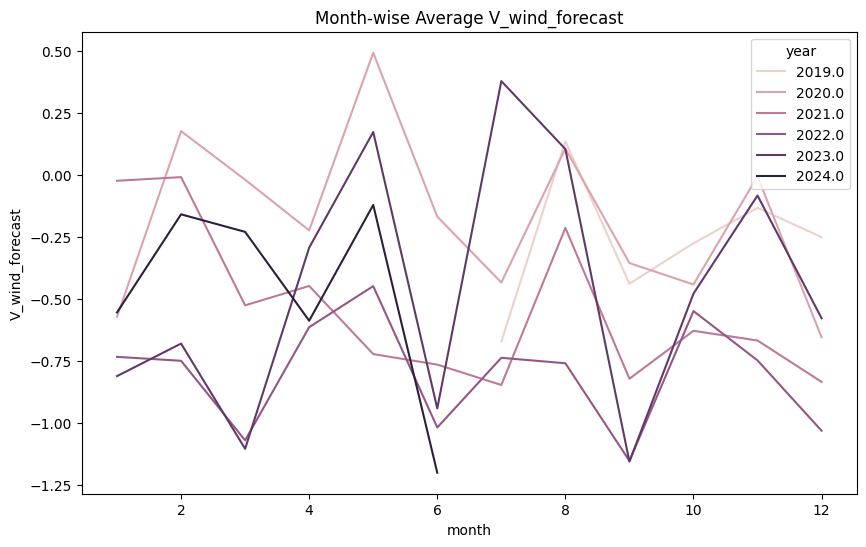

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_data,x="month",y="V_wind_forecast",hue="year")
plt.title("Month-wise Average V_wind_forecast")
plt.show()

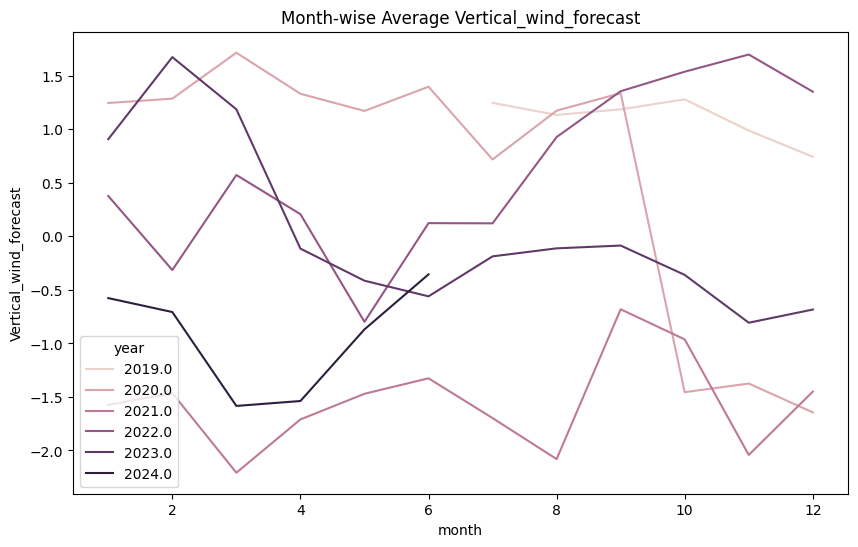

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_data,x="month",y="Vertical_wind_forecast",hue="year")
plt.title("Month-wise Average Vertical_wind_forecast")
plt.show()

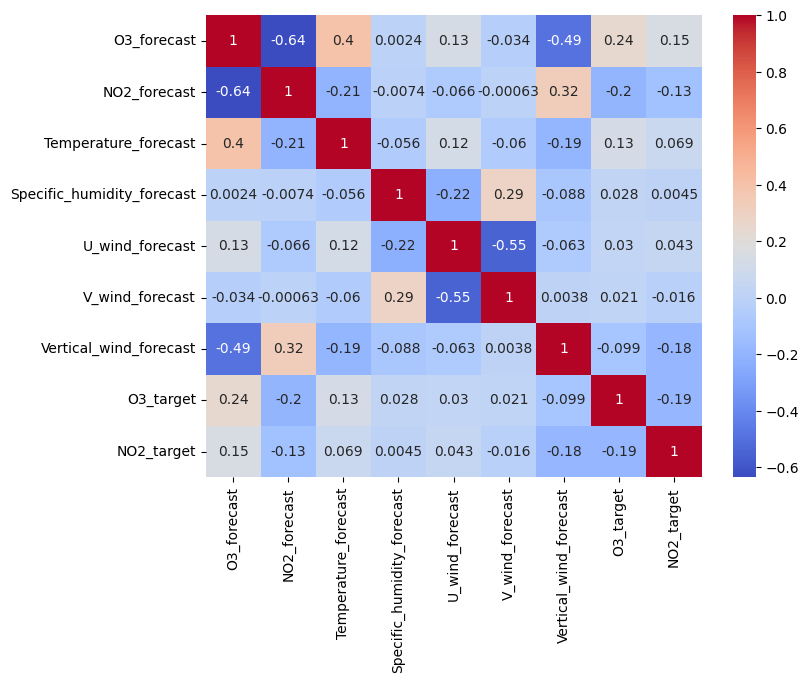

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=["year","month","day","date","hour"]).corr(),annot=True,cmap="coolwarm")
plt.show()